# Problem set 4

Camellia Haghverdian

Loan Income Students' Loan Repayment and State Grants

03/21/2024

## 1. Visually assess heteroscedasticity [1 pt]

    A. Create a scatterplot of a dependent variable and independent variable of interest from a dataset of your choice.
    
    B. Include a fitted line with an area graph (shadow) of the confidence interval for the prediction.
    
    C. Write a couple sentences describing how the distribution of the data in the graph does or does not appear to be heteroscedastic.

In [1]:
insheet using "/Users/camellia/Documents/Stats 2/soc211_assignments/week10/loanrepay2013_highestresearch.csv", clear
eststo clear
keep y_lo_inc_rpy sgrnt_low_~c

(19 vars, 33 obs)


In [2]:
%set graph_height = 8

graph size was (5.5in, 4in), is now (5.5in, 8).


In [3]:
%set graph_width = 11

graph size was (5.5in, 8), is now (11, 8).


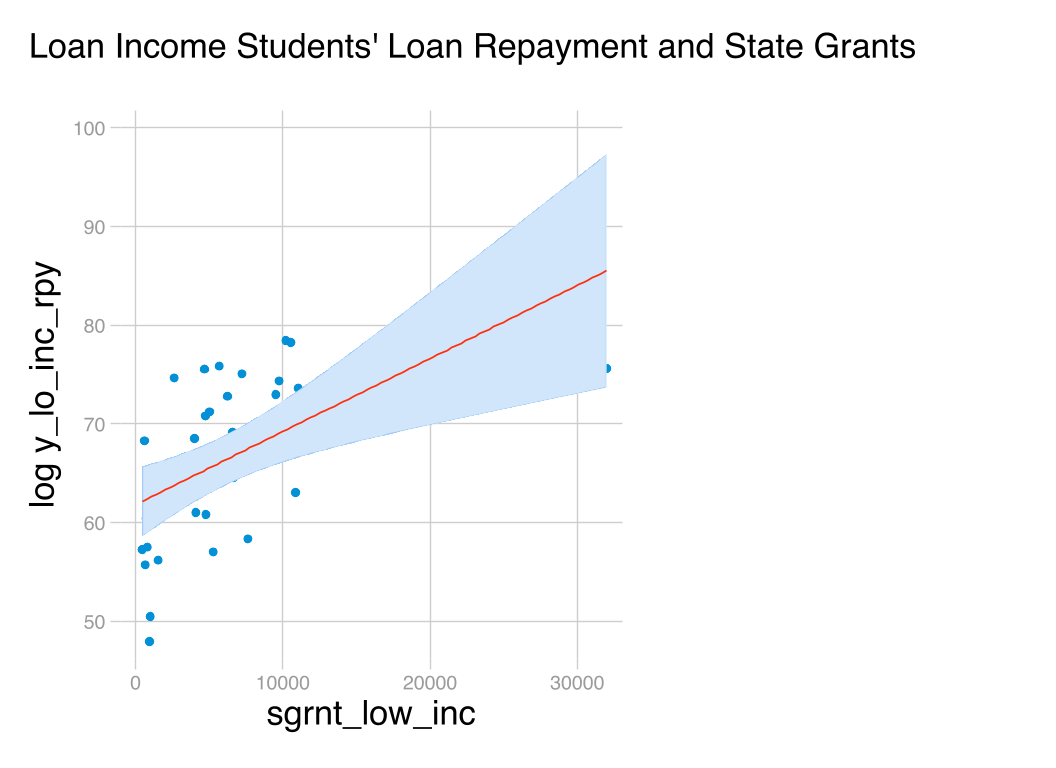

In [4]:
tw (scatter y_lo_inc_rpy sgrnt_low_~c) ///
(lfitci y_lo_inc_rpy sgrnt_low_~c), ///
ytitle(log y_lo_inc_rpy, size(large)) ///
xtitle(,size(large)) legend(off) scheme(538w) ///
title("Loan Income Students' Loan Repayment and State Grants" " ", span size(large)) ///
aspect(1, place(west))

In [5]:
ds

y_lo_inc_rpy  sgrnt_low_~c


In [6]:
codebook sgrnt_low_~c


-------------------------------------------------------------------------------
sgrnt_low_inc                                                       (unlabeled)
-------------------------------------------------------------------------------

                  Type: Numeric (float)

                 Range: [438.66541,31988.313]         Units: .00001
         Unique values: 33                        Missing .: 0/33

                  Mean:  5975.7
             Std. dev.: 5837.97

           Percentiles:     10%       25%       50%       75%       90%
                        714.635   1529.61   5026.69   8263.27   10553.3


1C: Looking at the shadow with the confidence interval, I can see that it is not consistent across the graph. Therefore, this inconsistency represents 
heteroscadasticity. It means that there is a change in the number of the residuals across the graph. The shadow is thinner on the left because more dots exist 
in that area, meaning data is more concentrated on the left rather than on the right, which is why the shadow is thicker on the right. I can say that the relationship 
between low income loan repayment and student grants is heteroscedastic.

## 2. Test for heteroscedasticity [1 pt]

    A. Do a Breusch-Pagan postestimation test for heteroscedasticity in your dependent variable and independent variable relationship.

    B. Reestimate the regression after logging the DV or IV if appropriate and do another Breusch-Pagan test. Does logging reduce heteroscedasticity?

In [7]:
quietly reg y_lo_inc_rpy sgrnt_low_~c
estat hettest


Breusch–Pagan/Cook–Weisberg test for heteroskedasticity 
Assumption: Normal error terms
Variable: Fitted values of y_lo_inc_rpy

H0: Constant variance

    chi2(1) =   0.04
Prob > chi2 = 0.8341


In [8]:
gen y_lo_inc_rpyln = log(y_lo_inc_rpy)
gen sgrnt_low_incln = log(sgrnt_low_inc)

quietly reg y_lo_inc_rpyln sgrnt_low_inc
estat hettest


Breusch–Pagan/Cook–Weisberg test for heteroskedasticity 
Assumption: Normal error terms
Variable: Fitted values of y_lo_inc_rpyln

H0: Constant variance

    chi2(1) =   0.00
Prob > chi2 = 0.9772


2B: The test shows that the probability is 0.9772, which is much bigger than .05, meaning that unlike the graph in the previous question,
this test does not show any heteroscedasticity.

## 3. Boot strap your standard errors [1 pt.]

    A. Quietly reestimate your regression coefficient with convential OLS and store the results.
    
    B. Quietly reestimate your regression with bootstrapped standard errors and store the results.
    
    C. Use esttab to output the results of the two models and tell us how the bootstrap standard erros differ from the conventional results.
    
    D. Explain in your own words what the bootstrap procedure is doing and why it yields similar or different standard errors to the convential model.

In [14]:
*A: Conventional OLS

eststo: quietly reg y_lo_inc_rpyln sgrnt_low_inc

(est2 stored)


In [15]:
*B: OLS with Bootstrapped SEs

quietly bootstrap _b[sgrnt_low_inc], rep(1000) nodots : ///
    reg y_lo_inc_rpyln sgrnt_low_inc

In [16]:
*C: The Table

esttab, ///
mlabels("OLS" "Bootstrap") ///
collabels(none)  ///
cells(b(star fmt(2)) se(fmt(2) par)) ///
starlevels(^ .1 * .05 ** .01 *** .001)

(tabulating estimates stored by eststo; specify "." to tabulate the active resu
> lts)

--------------------------------------------
                      (1)             (2)   
                      OLS       Bootstrap   
--------------------------------------------
sgrnt_low_~c         0.00**          0.00** 
                   (0.00)          (0.00)   
_cons                4.12***         4.12***
                   (0.03)          (0.03)   
--------------------------------------------
N                      33              33   
--------------------------------------------


3D: Bootsrapping is a technique used for resampling which takes data points from the dataset, in other words takes a new sample, and gives the data points
new standard errors. Looking at the standard error of the bootstrap model (0.00), I can see that it is not different from the standard error in the OLS/
conventional model (0.00), meaning the OLS model alone already gives good enough of an estimation of the data. For the bootstrap model to show a more effective 
estimation, the co-efficient needs to change compared to the OLS model.

## 4. Estimate robust standard errors [1 pt]

    A. Reestimate your model with robust standard errors and store the results.
    
    B. Use esttab to output the results of the robust model alongside the conventional and bootstrap models and explain how the the results compare in 1 or 2 sentences.
    
    C. In your own words, explain how the robust standard errors procedure differs from conventional procedures.

In [17]:
*A: OLS with Robust SEs

eststo: quietly reg y_lo_inc_rpyln sgrnt_low_~c, robust

(est3 stored)


In [18]:
*B: Creating the table again with the new model

esttab, ///
mlabels("OLS" "Bootstrap" "Robust") ///
collabels(none)  ///
cells(b(star fmt(2)) se(fmt(2) par)) ///
starlevels(^ .1 * .05 ** .01 *** .001)


------------------------------------------------------------
                      (1)             (2)             (3)   
                      OLS       Bootstrap          Robust   
------------------------------------------------------------
sgrnt_low_~c         0.00**          0.00**          0.00*  
                   (0.00)          (0.00)          (0.00)   
_cons                4.12***         4.12***         4.12***
                   (0.03)          (0.03)          (0.03)   
------------------------------------------------------------
N                      33              33              33   
------------------------------------------------------------


4B and 4C: Robust standard errors are a way to control the outliers. They give more weight to the variables that are closer to the average as opposed to 
more disperesed data points, the outliers. Even after applying robust standard errors, the results continue to not change (0.00, just like the bootstrap
model and the conventional model, meaning that the conventional OLS model gave us good enough of an estimation in the first place.

## 5. Cluster robust standard errors [1 pt]

    A. Explain why or why not your model should be estimated with cluster robust standard errors. If yes, what is the clustering unit and why?
    
    B. If yes, reestimate your model with cluster robust standard errors and use esttab to output the results of the robust model alongside your other models and explain how the the results compare in 1 or 2 sentences.
    
    C. Write a couple sentences explaining what is the best method of standard error estimation for your models and why.

5A: I cannot use cluster robust standard errors here because I don't have clusters/groups in this dataset.

5C: For datasets with 30-100 observations or in general small datasets, the bootstrap model works better. I have 33 observations in this dataset, therefore bootsrapping would be the best method of standard error estimation for my model, compared to cluster robust standard errors that suits estimations for larger datasets containing clusters.